>#  HW2. 인구 구조 항아리 막대 그래프 - 1
학번: A70064, 이름: 안종민

목표: `population_by_gender.csv`에서 특정 지역(예: 서울특별시)의 연령별 남녀 인구 구조를 한 방향 막대그래프(여성 먼저, 남성 겹침)로 시각화합니다.

데이터 출처: 행정안전부 주민등록인구통계 CSV (`population_by_gender.csv`)

시각화 도구: `Python`, `Matplotlib`

---
---

### 1. 환경 설정 & 드라이브 마운트

- Colab 환경에서 구글 드라이브를 연동하고, 필요한 라이브러리를 불러옵니다.

In [15]:
# 라이브러리 임포트 및 구글 드라이브 마운트

from google.colab import drive
import csv
import os
import matplotlib.pyplot as plt

drive.mount('./gdrive', force_remount=True)
print(os.getcwd())

Mounted at ./gdrive
/content


### 2. 데이터 로드

- 데이터 파일을 읽고, 첫 줄의 컬럼명을 건너뛴 뒤 데이터를 리스트로 저장합니다.

In [16]:
# 데이터 로드

f = open('./gdrive/MyDrive/Colab Notebooks/ch5_population/population_by_gender.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)  # 첫 줄은 헤더이므로 건너뛰기

### 3. 데이터 추출

- 서울특별시의 행을 찾아, 남성과 여성의 연령별 인구 수를 분리합니다.
- `row[0]`에는 행정구역명이, `row[3:104]`와 `row[106:]`에는 각각 0~100세 인구수가 쉼표 포함 문자열로 저장되어 있습니다.
- `replace(',', '')`로 쉼표를 제거한 후 `int()`로 변환합니다.

In [17]:
# 데이터 추출

# '서울특별시' 행 찾기
# Iterator 'data'에서 한행(row)씩 불러옴
for row in data:
    if '서울특별시' in row[0]:
        break

# 남성 데이터 추출 (인덱스 3~103 → 0~100세)
male = [int(x.replace(',', '')) for x in row[3:104]]

# 여성 데이터 : -1~-101 슬라이스 후 reverse()
female = row[-1:-102:-1]  # ['여_100세', ..., '여_0세']
female.reverse()          # ['여_0세', ..., '여_100세']
female = [int(x.replace(',', '')) for x in female]

# 나이 축 생성 (0세부터 100세)
ages = list(range(101))

f.close()

### 4. 시각화 설정 및 그래프 출력

- 그래프 크기를 지정하고, 전체 레이아웃을 초기화합니다.
- 여성 인구를 먼저 그리고, 남성 인구를 그 위에 겹쳐서 한 방향 막대그래프를 완성합니다.
- `barh`는 수평 막대를 그리는 함수입니다. `ages`가 y축, 여성/남성 인구수가 x축이 됩니다.



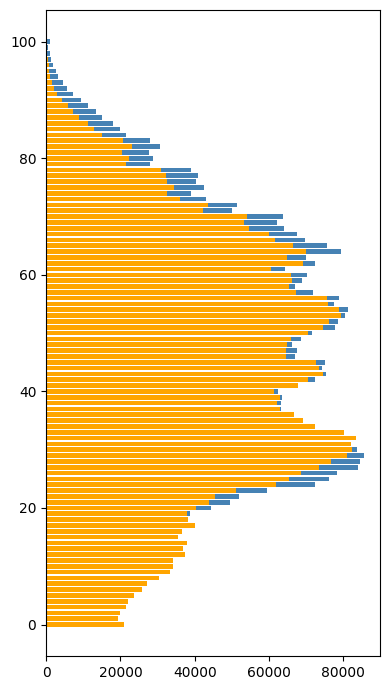

In [18]:
# 시각화 그래프 출력
plt.figure(figsize=(4, 7))
plt.barh(ages, female, color='steelblue', label='Female') # 여성 먼저
plt.barh(ages, male,   color='orange', label='Male') # 남성은 그 위에 출력
plt.tight_layout()
plt.show()